# Restaurant Food Cost

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.


Dataset Attributes

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.


# 1] EXPLORING DATASET

In [291]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [292]:
#Downloading the raw data and loading into dataframe with the help of pandas library:-Training data
df=pd.read_excel(r"C:\Users\sesur\OneDrive\Desktop\Documents\Data_Train excel.xlsx")

In [293]:
#Downloading the raw data and loading into dataframe with the help of pandas library:- Test data
test_df=pd.read_excel(r"C:\Users\sesur\Downloads\Data_Test.xlsx")

In [294]:
#For viewing the first 5 columns in given dataset: Training data
df.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [295]:
#For viewing the first 5 columns in given dataset:Testing data
test_df.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [296]:
#To know about the no of rows and columns in the dataset
df.shape

(12690, 9)

In [297]:
#To know about the no of rows and columns in the dataset
test_df.shape

(4231, 8)

In [298]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [299]:
#To know more about the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


From this we can say that numerical columns are: RESTAURANT_ID,COST
All other columns are categorical columns.

To analyse how many distinct values in the column:
    

In [300]:
len(df["TITLE"].unique())

113

In [301]:
len(df["CUISINES"].unique())

4155

In [302]:
len(df["CITY"].unique())

360

In [303]:
len(df["LOCALITY"].unique())

1417

In [304]:
len(df["RATING"].unique())

34

In [305]:
len(df["VOTES"].unique())

1848

From this we can see that there are high cardinality in the data we have to simplify the caategories first.

2]Simplifying the unique values in the column:

To find how many values in each row for specific data:

In [306]:
#Analysing the title column:
max = 1
for i in df['TITLE']:
    if len(i.split(',')) > max:
         max = len(i.split(','))
print(max)

2


There are two titles maximum present in the title.

In [307]:
titles = []
for i in df['TITLE']:
    if len(i.split(',')) == 1:# if it has 1 title
         titles.append(i.split(',')[0].strip().upper())
    else :
        for j in range(len(i.split(','))):
            titles.append(i.split(',')[j].strip().upper())

print(len(pd.Series(titles).unique()))
print(pd.Series(titles).unique())

titles = list(pd.Series(titles).unique())

24
['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP']


From this title column is simplified to this level.

In [308]:
#analysing the cuisine column:
max = 1
for i in df['CUISINES'] :
    if len(i.split(',')) > max:
         max = len(i.split(','))
print(max)

8


There are 8 labels in the cuisine.

In [309]:
cuisines = []
for i in df['CUISINES']:
    if len(i.split(',')) == 1:
         cuisines.append(i.split(',')[0].strip().upper())
    else :
        for j in range(len(i.split(','))):
            cuisines.append(i.split(',')[j].strip().upper())

print(len(pd.Series(cuisines).unique()))
print(pd.Series(cuisines).unique())

cuisines = list(pd.Series(cuisines).unique())

125
['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 'SINGAPOREAN' 'GERMAN' 'MIDDLE EASTERN' 'SINDHI' 'CANTONESE' 'HOT POT'
 'PAN ASIAN' 'S

Reduced the cusine column.

In [310]:
#Reducing the cities column:
cities = list(df['CITY'])
for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NA'
    cities[i] = cities[i].strip().upper()
        
print(len(pd.Series(cities).unique()))
print(pd.Series(cities).unique())
cities = list(pd.Series(cities).unique())

355
['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'NA' 'INDIA' 'MADHURANAGAR'
 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVALI' 'KOCHI PALARIVATTOM' 'DEWAN RAMA ROAD'
 'GURUGRAM' 'SECTOR 51 NOIDA' 'KALOOR' '

#Reducing the locality column:

In [311]:
locality = list(df['LOCALITY'])
for i in range(len(locality)):
    if type(locality[i]) == float:
        locality[i] = 'NA'
    locality[i] = locality[i].strip().upper()


print(pd.Series(locality).unique())
locality= list(pd.Series(locality).unique())

['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'MARKET ROAD'
 'NEAR PERAMBUR' 'NEAR MALVIYA NAGAR']


In [312]:
locality

['DOMBIVALI EAST',
 'RAMAPURAM',
 'SALIGRAMAM',
 'BANDRA WEST',
 'LOWER PAREL',
 'VILE PARLE WEST',
 'KORAMANGALA 6TH BLOCK',
 'SECTOR 29',
 'BANNERGHATTA ROAD',
 'DILSUKHNAGAR',
 'KORAMANGALA 5TH BLOCK',
 'INDIRANAGAR',
 'CHULLICKAL',
 'EDAPPALLY',
 'MAJIWADA',
 'JUBILEE HILLS',
 'BORIVALI WEST',
 'NAGOLE',
 'ANDHERI LOKHANDWALA',
 'KRISHNA NAGAR',
 'HITECH CITY',
 'KAROL BAGH',
 'SDA',
 'THIPPASANDRA',
 'DWARKA',
 'KAKKANAD',
 'HSR',
 'VADAPALANI',
 'NEELANGARAI',
 'KORATTUR',
 'DLF CYBER CITY',
 'VERSOVA',
 'PALARIVATTOM',
 'BESANT NAGAR',
 'INTERNATIONAL AIRPORT',
 'SHOLINGANALLUR',
 'MG ROAD',
 'NUNGAMBAKKAM',
 'KR PURAM',
 'KONDAPUR',
 'ULSOOR',
 'KALOOR',
 'BEGUM BAZAAR',
 'SECTOR 15',
 'FILM CITY ROAD',
 'WHITEFIELD',
 'CHITTOOR ROAD',
 'RAJAJINAGAR',
 'BANASWADI',
 'PANAMPILLY NAGAR',
 'RAJINDER NAGAR',
 'TARNAKA',
 'KERALA',
 'T. NAGAR',
 'JALAHALLI',
 'GREATER KAILASH (GK) 2',
 'KALAMASSERY',
 'KENGERI',
 'MAZGAON',
 'TRIPLICANE',
 'BTM',
 'KALWA',
 'MATTANCHERRY',
 'KALKAJI

In [313]:
df.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                              '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout'], 
                                value='Bangalore',inplace=True)

In [314]:
df.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur'],
                                value='Chennai',inplace=True)

In [315]:
df.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills'],value='Hyderabad',inplace=True)


In [316]:
df.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                             'Kochi-16'], 
                                value='Kochi',inplace=True)

In [317]:
df.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                              'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.'],
                                value='Secunderabad',inplace=True)


In [318]:
df.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                             'Powai'],
                               value='Mumbai',inplace=True)


In [319]:
df.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram'],value='New Delhi',inplace=True)

In [320]:
df.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida'],value='Noida',
                            inplace=True)

In [321]:
df.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana'],value='Gurgaon',inplace=True)

In [322]:
test_df.replace(to_replace = ['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                              '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
                              'BTM Layout','JP Nagar Bangalore','Whitefield Bangalore',
                              'Bangalore - 560076','Bangalore.',
                              'Banaswadi (Next to Indian Bank) Bangalore','BTM Bangalore',
                              'Bangalore Koramangala 7th Block','bangalore : 560085',
                              'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                              'Karnataka 560043','Bangalore - 560103','Banglaore',
                              'Kanakapura Road Banglore','BTM 1st Stage','Marathahalli',
                              'Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore',
                              'Bangalore 560076','Bangalore Road','Karnataka','Karnataka 560103',
                              'SG Palya','Karnataka 560102','Karnataka 560037', 'B.B.M.P East (Karnataka) - 560049',
                              'Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                             'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                              'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout'], 
                                value='Bangalore',inplace=True)

In [323]:
test_df.replace(to_replace = ['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                              'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                              'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                              'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                              'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                              'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                              'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                              'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                              'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                              'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                              'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                              'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                              'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur'],
                                value='Chennai',inplace=True)


In [324]:
test_df.replace(to_replace=['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                            'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                            'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                            'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                            'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                            'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills'],value='Hyderabad',inplace=True)

In [325]:
test_df.replace(to_replace = ['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                              'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal',
                              'Kochi-683101','p.o Kochi','Kerala 683104','Kerala 682013',
                              'MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram', 'Kerala 690525','Kochi-18',
                              'MG Road Ernakulam','Kochi Kakkanad', 'Kochi International Airport VIP Road', 
                              'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi',
                              'Kochi Aluva 102', 'Kerala 682024', 'Kochi','Kakkanad','Kaloor','Palarivattom',
                             'Kochi-16'], 
                                value='Kochi',inplace=True)

In [326]:
test_df.replace(to_replace = [ 'Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE',
                              'Secunderabad ECIL','Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.'],
                                value='Secunderabad',inplace=True)


In [327]:
test_df.replace(to_replace = ['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                              'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                              'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                              'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                              'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                              'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                              'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                             'Powai'],
                               value='Mumbai',inplace=True)


In [328]:
test_df.replace(to_replace=[ 'New Delhi','Delhi','Delhi NCR','Chander Nagar New Delhi','New Delhi.',
                            'New Delhi-110024','Greater Kailash 2 New Delhi',
                            'Amrit kaur market opposite new delhi railway station paharganj',
                            'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075',
                            'Janakpuri', 'Dist. Center New Delhi','Gurugram'],value='New Delhi',inplace=True)


In [329]:
test_df.replace(to_replace=['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida'],value='Noida',
                            inplace=True)


In [330]:
test_df.replace(to_replace=['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana'],value='Gurgaon',inplace=True)

In [331]:
#Deleting the time column:
df.drop(['TIME'],axis=1,inplace=True)
test_df.drop(["TIME"],axis=1,inplace=True)

In [332]:
test_df["VOTES"]=test_df["VOTES"].str.replace("votes"," ")
df["VOTES"]=df["VOTES"].str.replace("votes"," ")

In this simplified the distinct values in the column.Deleted the time column and replaced the word votes in the vote column.

# 3] ANALYSING  AND VISUALISATION OF THE DATASET

1)Identifying the missing values:

In [333]:
#To know about the missing values in the given dataset
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

There are missing values in the column -votes,locality and city.The percentage of misssing values are also less than 5%. We will impute the missing values.Since these are categorical columns replacing with mode of these columns.

In [334]:
df["CITY"].fillna(df["CITY"].mode()[0],inplace=True)
df["LOCALITY"].fillna(df["LOCALITY"].mode()[0],inplace=True)
df["RATING"].fillna(df["RATING"].mode()[0],inplace=True)
df["VOTES"].fillna(df["VOTES"].mode()[0],inplace=True)

In [335]:
#To know about the missing values in the given dataset-Training data
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [336]:
#To know about the missing values in the given dataset-Test data
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [337]:
test_df["CITY"].fillna(test_df["CITY"].mode()[0],inplace=True)
test_df["VOTES"].fillna(test_df["VOTES"].mode()[0],inplace=True)
test_df["LOCALITY"].fillna(test_df["LOCALITY"].mode()[0],inplace=True)
test_df["RATING"].fillna(test_df["RATING"].mode()[0],inplace=True)

In [338]:
#To know about the missing values in the given dataset-Test data
test_df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [339]:
#Replacing empty and string value new to 0[zero]:
df["RATING"].unique()

array([3.6, 4.2, 3.8, 4.1, 4, 4.3, 3.9, 3.3, 3.4, '-', 4.5, 3.5, 4.4, 2.7,
       3.7, 4.7, 'NEW', 3.1, 2.5, '3.7', 4.6, 2.8, 3, 3.2, 2.6, 2.9, 4.9,
       4.8, 2.4, 2.3, 2, 2.1, 2.2], dtype=object)

In [340]:
a=["NEW","-"]
b=[0,0]
d=dict(zip(a,b))
df.RATING=df.RATING.replace(d,regex=True)
df.RATING.unique()

array([3.6, 4.2, 3.8, 4.1, 4, 4.3, 3.9, 3.3, 3.4, 0, 4.5, 3.5, 4.4, 2.7,
       3.7, 4.7, 3.1, 2.5, '3.7', 4.6, 2.8, 3, 3.2, 2.6, 2.9, 4.9, 4.8,
       2.4, 2.3, 2, 2.1, 2.2], dtype=object)

In [341]:
test_df["RATING"]=test_df["RATING"].replace(d,regex=True)
test_df["RATING"].unique()

array([4.3, 4.2, 3.8, 3.6, 3.7, 0. , 4. , 3.4, 3.2, 4.1, 3. , 3.5, 4.5,
       3.9, 3.3, 2.9, 3.1, 2.5, 2.8, 4.6, 4.4, 2.7, 4.8, 2.6, 4.9, 2.1,
       4.7, 2.3, 2.4, 2.2])

In [342]:
#To see the skewness of the data:
df.skew()

RESTAURANT_ID     0.006947
RATING           -2.216295
VOTES            14.609221
COST              3.978801
dtype: float64

<Axes: >

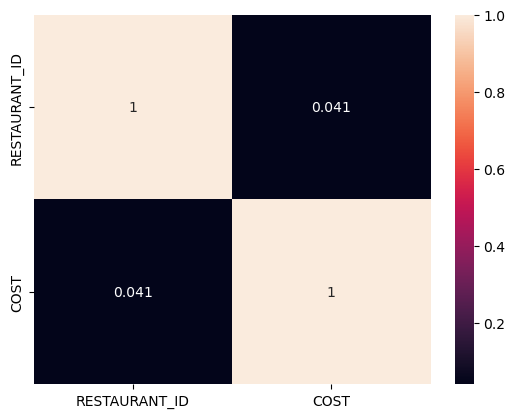

In [343]:
sns.heatmap(df.corr(),annot=True)

Since these are categorical values not much multicolinearity is seen in these dataset.

# 4] Encoding the categorical variables into numerical variables:

Encoding the values with label Encoder:

In [344]:
#importing the necessary libraries:
from sklearn.preprocessing import LabelEncoder

In [345]:
encoder= LabelEncoder()

In [346]:
#by using target encoder encoding marital column:
df["TITLE"]=encoder.fit_transform(df["TITLE"])
df["CUISINES"]=encoder.fit_transform(df["CUISINES"])
df["CITY"]=encoder.fit_transform(df["CITY"])
df["LOCALITY"]=encoder.fit_transform(df["LOCALITY"])

In [347]:
df

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,85,271,3.6,49,1200
1,33,13198,289,28,208,4.2,30,1500
2,31,10915,2976,28,1049,3.8,221,800
3,95,6346,4130,85,690,4.1,24,800
4,50,15387,1766,85,585,3.8,165,300
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,50,394,3.8,546,500
12686,33,9686,2143,85,124,4.3,1214,1800
12687,71,11133,2088,85,1283,4,608,1300
12688,31,6134,3506,28,595,3.5,32,400


In [348]:
#by using target encoder encoding marital column:
test_df["TITLE"]=encoder.fit_transform(test_df["TITLE"])
test_df["CUISINES"]=encoder.fit_transform(test_df["CUISINES"])
test_df["CITY"]=encoder.fit_transform(test_df["CITY"])
test_df["LOCALITY"]=encoder.fit_transform(test_df["LOCALITY"])

In [349]:
test_df

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,79,615,4.3,564
1,75,12680,1632,67,202,4.2,61
2,23,1411,1455,67,376,3.8,350
3,66,204,208,29,419,3.8,1445
4,75,13453,1637,54,302,3.6,23
...,...,...,...,...,...,...,...
4226,23,9057,1425,77,551,3.9,287
4227,66,1247,267,6,66,4.3,469
4228,75,8617,679,29,649,3.7,53
4229,75,6485,1541,54,302,0.0,6


# 5)Splitting The Dataset Into Feature and Target:

In [350]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [351]:
X=df.drop(columns=["COST"])
Y=df["COST"]

In [352]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

spliting the data into train and test.Model will be built on training data and tested on test data.

In [353]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=2)

# 1)Linear Regression Model:

In [354]:
#Model instantiating and training
LR=LinearRegression() 
LR.fit(x_train,y_train)

LinearRegression()

In [355]:
#predicting for the x_test 
ytest_pred=LR.predict(x_test)

In [356]:
#predicting for the x_train
ytrain_pred=LR.predict(x_train)

In [357]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 331.93079103774
Mean Squared Error: 335886.6171802025
Root Mean Squared Error: 579.5572596216896
r2_score: 0.15001357724828812


In [358]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error:",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score:",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error: 342.6171643988816
Mean Squared Error: 327248.77637681115
Root Mean Squared Error: 572.0566199047181
r2_score: 0.14959161551817723


# 2:RANDOM FOREST REGRESSOR

In [359]:
#Model instantiating and training
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [360]:
#predicting for the x_test 
ytest_pred=RFR.predict(x_test)

In [361]:
#predicting for the x_train
y_train_pred=RFR.predict(x_train)

In [362]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 331.93079103774
Mean Squared Error: 335886.6171802025
Root Mean Squared Error: 579.5572596216896
r2_score: 0.15001357724828812


In [363]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score: ",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error:  193.17493695823484
Mean Squared Error:  103365.1116503152
Root Mean Squared Error:  321.5044504362501
r2_score:  0.7313891939228758


# 6)Build a predictive model:

In [364]:
test_data=scaler.fit_transform(test_df)#performing standardisation

In [365]:
cost_prediction=RFR.predict(test_data)#using random forest regressor

In [366]:
#Testing the values
cost_prediction

array([1188.5,  331.8,  664.8, ...,  368. ,  568. ,  338. ])

In [367]:
#creating a dataframe
COST=pd.DataFrame({
    "COST":cost_prediction
})

In [368]:
COST.to_csv("cost.csv")

In [369]:
#To convert into csv
pred=pd.read_csv("cost.csv")

In [370]:
#Displaying the column
COST

,COST
0,1188.5
1,331.8
2,664.8
3,1494.0
4,382.0
...,...
4226,724.0
4227,1648.0
4228,368.0
4229,568.0


In [371]:
#End of the project